# Введение в анализ данных
## Домашнее задание 2. `Pandas` и `Seaborn`


**Правила:**

* Дедлайн **30 апреля 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту `mipt.stats@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 2"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `2.N.ipynb` и `2.N.pdf`, где `N` -- ваш номер из таблицы с оценками. *pdf-версию можно сделать с помощью Ctrl+P. Пожалуйста, посмотрите ее полностью перед отправкой. Если что-то существенное не напечатается в pdf, то баллы могут быть снижены.*
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код при проверке запускаться не будет.

**Баллы за задание:**

Легкая часть (достаточно на "хор"):

* Задача 1 -- 4 балла
* Задача 2 -- 2 балла

Сложная часть (необходимо на "отл"):

* Задача 3 -- 5 баллов
* Задача 4 -- 3 балла
* Задача 5 -- 8 баллов

Баллы за разные части суммируются отдельно, нормируются впоследствии также отдельно. Иначе говоря, 1 балл за легкую часть может быть не равен 1 баллу за сложную часть.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3)
%matplotlib inline

## Легкая часть

### Задача 1

Представьте, что вы министр образования страны котиков. Вам нужно решить какие школы лучше: маленькие или большие.

Вы решили, что нужно сравнить их по результатам единого кошачьего экзамена (ЕКЭ). Предлагается посмотреть на средний результат по школам: отсортировать по нему и сделать выводы исходя из топ 10 лучших школ.

Вам дан датасет `cat_exam_data.csv`

Описание данных:

* `school` -- номер школы;
* `test_score` -- результат одного ученика из этой школы;
* `number_of_students` -- кол-во учеников в школе.

Приведены данные по всем ученикам из 500 школ страны котиков.

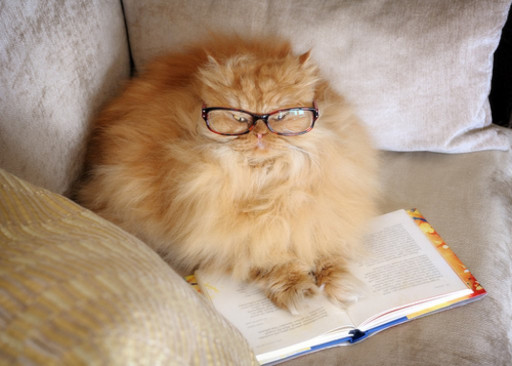

Загрузите датасет с результатами экзамена и посмотрите на первые пять строк.

Это можно сделать с помощью методов  <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv</a> и <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html">head</a>.

In [215]:
df = pd.read_csv('cat_exam_data.csv')
df.head()

,school,test_score,number_of_students
0,26,39.0,965
1,54,64.0,1483
2,356,64.0,1055
3,108,68.0,1806
4,298,78.0,971


Проверьте, что в данных нет пропусков (`NaN`). Если они есть:
* проверьте в каком столбце;
* удалите их.

Могут помочь методы <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html">isna</a> и <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html">dropna</a>.

In [216]:
print(df.isna().sum(axis = 0))
df.dropna()

school                  0
test_score            204
number_of_students      0
dtype: int64


,school,test_score,number_of_students
0,26,39.0,965
1,54,64.0,1483
2,356,64.0,1055
3,108,68.0,1806
4,298,78.0,971
...,...,...,...
501557,52,65.0,1361
501558,412,37.0,1032
501559,165,80.0,974
501560,426,47.0,899


Посчитайте описательные статистики (среднее, мин, макс, и тд.) по колонкам в таблице с помощью одной функции:

In [217]:
df.describe()

,school,test_score,number_of_students
count,501562.000000,501358.000000,501562.000000
mean,250.095661,51.681788,1088.868830
std,144.428841,14.179981,281.022934
min,0.000000,-0.000000,156.000000
25%,125.000000,42.000000,890.000000
50%,250.000000,52.000000,1079.000000
75%,377.000000,61.000000,1285.000000
max,499.000000,100.000000,1806.000000


Посчитайте сколько котиков получили 100 баллов:

In [218]:
(df['test_score'] == 100).sum()

51

Выведите информацию о школах, где есть хотя бы один котик, получивший 100 баллов на ЕКЭ.

Отсортируйте эти школы по количеству стобалльников.

Могут помочь методы <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">groupby</a>, <a href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.sort_values.html">sort_values</a>, <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html">transform</a> и <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html">count</a>.

In [233]:
buff = df[['school', 'number_of_students']][df['test_score'] == 100].groupby('school').count()
res = pd.merge(df[['school', 'number_of_students']], buff,
               how='inner', on='school', suffixes=['','_top'])
res.drop_duplicates().sort_values(by='number_of_students_top', ascending=False)

,school,number_of_students,number_of_students_top
45952,486,800,2
0,359,895,1
36501,206,973,1
27100,351,1224,1
28324,113,939,1
29263,18,715,1
29978,303,701,1
30679,425,929,1
31608,90,1244,1
32852,471,960,1


Посчитайте средний результат каждой из школ и посмотрите на результат:

Может помочь метод <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html">mean</a>.

In [234]:
avg_res = df.groupby('school').mean()
avg_res

,test_score,number_of_students
school,,
0,52.294258,418
1,52.028950,1209
2,51.751451,1035
3,51.566265,1245
4,51.025641,1015
...,...,...
495,50.933275,1139
496,51.146402,1209
497,51.141228,1140


Отсортируйте школы по среднему результату:

In [237]:
avg_res = avg_res.sort_values(by='test_score')
avg_res

,test_score,number_of_students
school,,
353,50.050595,336
211,50.248571,351
486,50.325000,800
471,50.362500,960
194,50.406977,774
...,...,...
366,52.970207,773
82,52.981982,555
263,52.982063,669


Посмотрите на топ 10 лучших результатов:

In [239]:
avg_res.head(10)

,test_score,number_of_students
school,,
353,50.050595,336
211,50.248571,351
486,50.325000,800
471,50.362500,960
194,50.406977,774
394,50.461538,1079
156,50.641354,1093
48,50.690293,649
264,50.702906,929


**Вывод:** В лучших школах среднее количество учеников.

Ожидаем, что внизу рейтинга будут только большие школы, давайте это проверим.

Посмотрите теперь на 10 худших школ:

In [241]:
avg_res.tail(10)

,test_score,number_of_students
school,,
464,52.865429,431
477,52.898515,808
449,52.910364,357
169,52.932401,858
465,52.957555,1179
366,52.970207,773
82,52.981982,555
263,52.982063,669
124,52.993311,598


**Вывод:** Большая часть школ имеют большое количество учеников.

Постройте график зависимости среднего результата ЕКЭ от количества учеников:

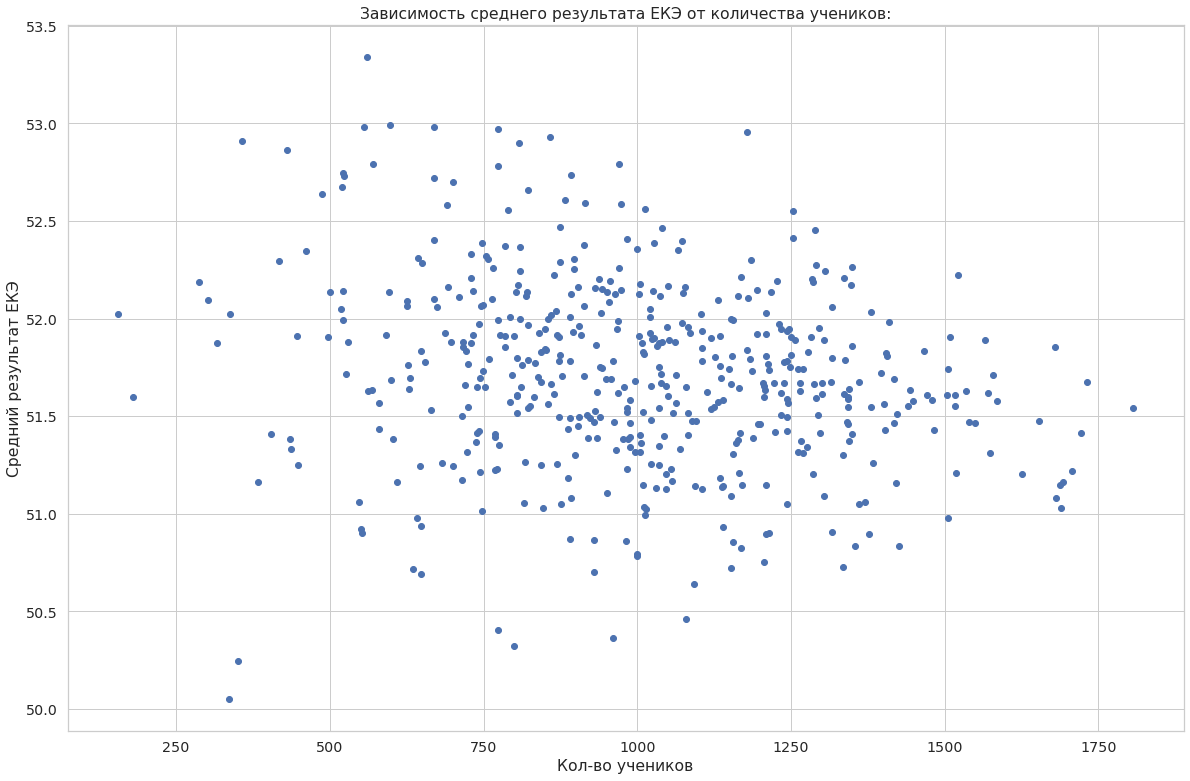

In [248]:
plt.figure(figsize=(20, 13))
plt.scatter(avg_res.number_of_students, avg_res.test_score)
plt.title('Зависимость среднего результата ЕКЭ от количества учеников:')
plt.xlabel('Кол-во учеников')
plt.ylabel('Средний результат ЕКЭ')
plt.show()

**Вывод:** У средних школ лучший резальтат.

Но как же тогда решить какие школы лучше? 

Сгруппируйте учеников в зависимости от типа школы (<= 1000 учеников == маленькая школа):

In [252]:
little = avg_res['test_score'][df['number_of_students'] <= 1000]
large = avg_res['test_score'][df['number_of_students'] > 1000]

Постройте гистограммы этих двух выборок на одном графике, установив параметры
* `bins=10` --- число бинов гистограммы;
* `alpha=0.5` --- прозрачность бинов.

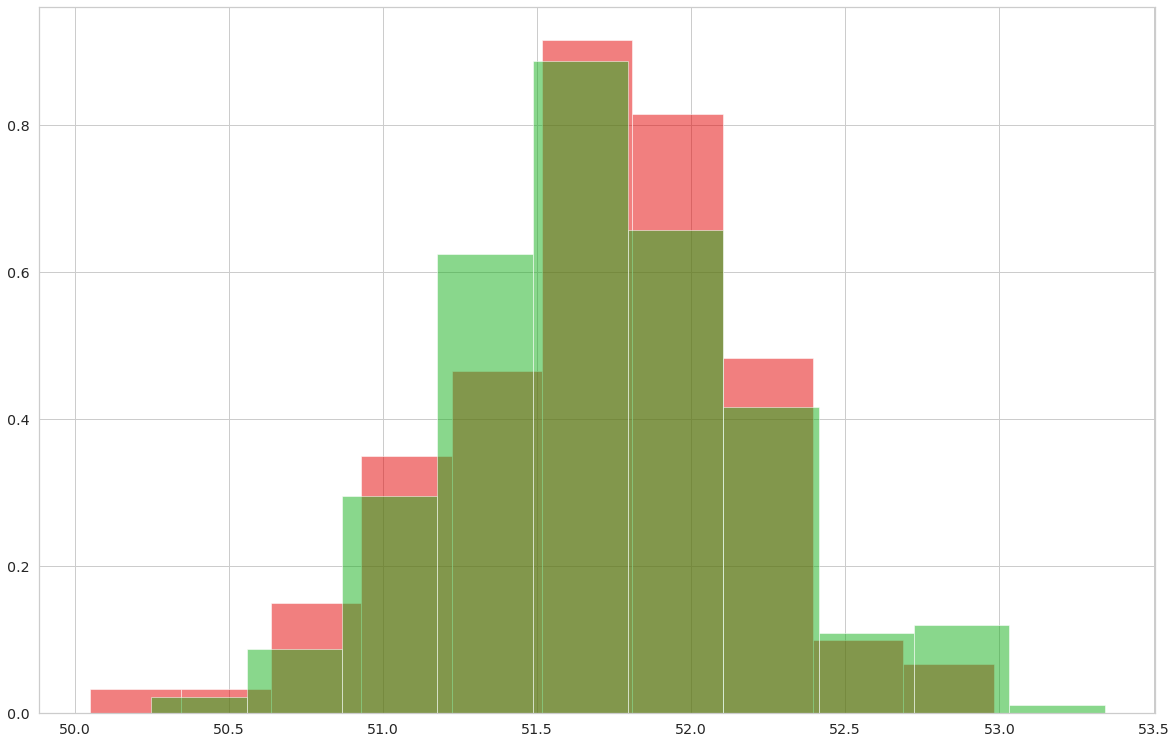

In [255]:

plt.figure(figsize=(20, 13))
plt.hist(
    little, 
    bins=10, 
    density=True, 
    alpha=0.5, 
    color='xkcd:red'
)
plt.hist(
    large, 
    bins=10, 
    density=True, 
    alpha=0.5, 
    color='xkcd:green'
)

plt.show()

**Вывод:** У небольших школ больше разброс среднего результата.

---

### Задача 2

Задача заключается в работе с данными о трендах на YouTube. В этом вам поможет библиотека `seaborn`, которая была рассмотрена на одной из последних лекций.

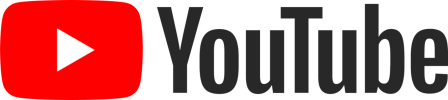


<b>1. Подготовка данных</b>

Скачайте файл `RUvideos_short.csv` с данными о видео в российском сегменте Youtube с 14 ноября по 21 ноября 2017 года. Полная версия данных доступна на <a href="https://www.kaggle.com/datasnaek/youtube-new#RUvideos.csv">kaggle</a>.

Прочитайте данные с помощью библиотеки `pandas` и напечатайте начало таблицы. В колонке `trending_date` записана дата. При чтении таблицы распознайте ее.

In [258]:
df = pd.read_csv("RUvideos_short.csv")
df['trending_date'] = pd.to_datetime(df['trending_date'], format= "%y.%d.%m")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,2017-11-14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,2017-11-14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,2017-11-14,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,2017-11-14,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,2017-11-14,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...


В таблице много лишних данных. Оставьте следующие столбцы:
* `trending_date` -- дата в формате год-день-месяц;
* `category_id` -- категория видео, названия приведены в файле `RU_category_id.json`;
* `views` -- количество просмотров видео;
* `likes` -- количество лайков;
* `dislikes` -- количество дислайков;
* `comment_count` -- количество комментариев.

Из даты оставьте только день. Для этого можно пройтись циклом по всем датам и взять поле `day` у даты. Напечатайте начало таблицы.

In [180]:
df = df[['trending_date', 'category_id', 'views', 'likes', 'dislikes', 'comment_count']]
df['trending_date'] = df['trending_date'].apply(lambda x: x.day)
df.head()

,trending_date,category_id,views,likes,dislikes,comment_count
0,14,22,62408,334,190,50
1,14,22,330043,43841,2244,2977
2,14,24,424596,49854,714,2944
3,14,22,112851,3566,122,80
4,14,24,243469,36216,631,1692


<b>2. Некоторая визуализация</b>

Постройте ящики с усами на каждый день по количеству просмотров. Насколько хороший получился график?

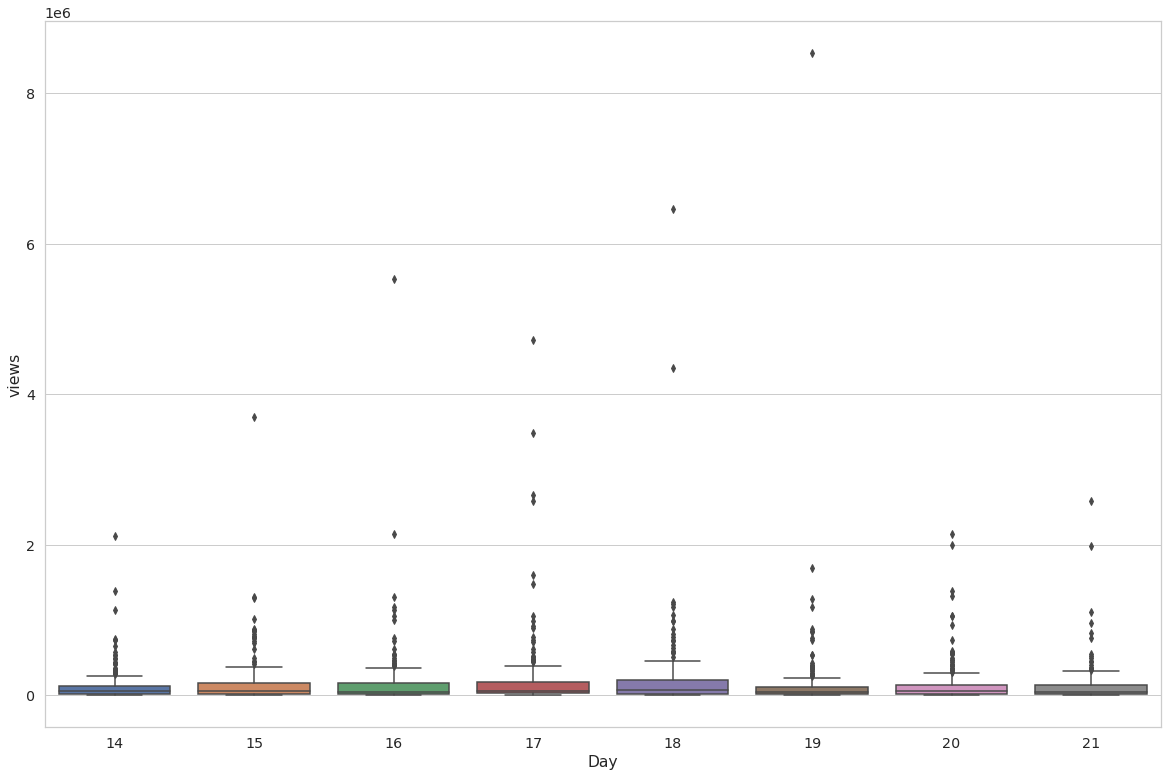

In [191]:
plt.figure(figsize=(20, 13))

sns.boxplot(x='trending_date', y='views', data=df)

plt.xlabel('Day')
plt.show()

Исправьте этот недостаток, установив некоторое значение. 

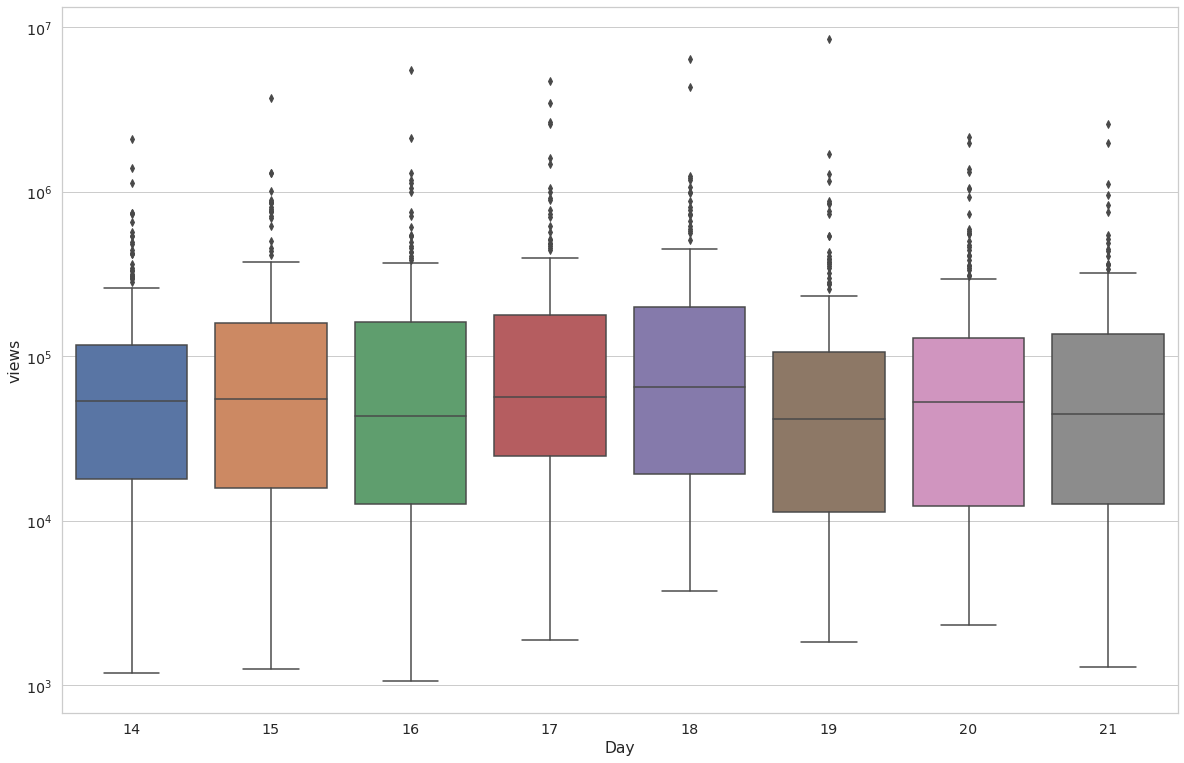

In [190]:
plt.figure(figsize=(20, 13))

sns.boxplot(x='trending_date', y='views', data=df)

plt.xlabel('Day')
plt.yscale('log')
plt.show()

Постройте jointplot по всем данным для количества просмотров по горизонтальной оси и количества лайков по вертикальной. Насколько информативен такой график?

<Figure size 1440x936 with 0 Axes>

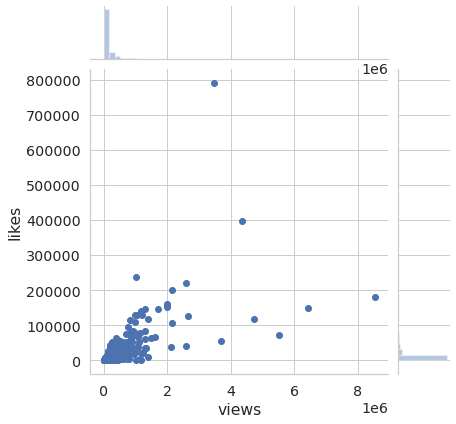

In [192]:
plt.figure(figsize=(20, 13))

sns.jointplot(x='views', y='likes', data=df)

plt.show()

Исправьте этот недостаток.

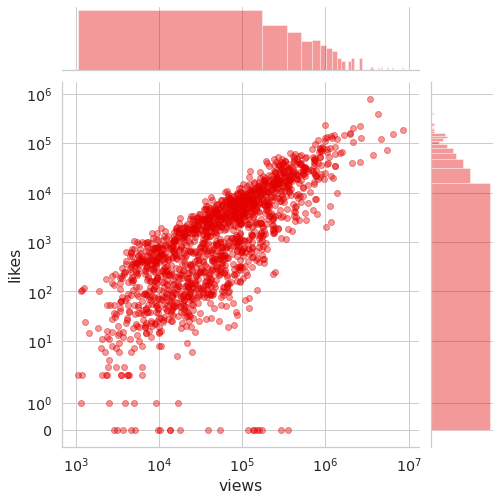

In [205]:
plot = sns.jointplot(x='views',
                     y='likes',
                     data=df,
                     alpha=0.4,
                     marginal_kws={'hist_kws': {'log': True}},
                     color= 'xkcd:red',
                     height=7)

plot.ax_joint.set_xscale('symlog')
plot.ax_joint.set_yscale('symlog')
plt.show()


---
## Сложная часть

### Задача 3

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  


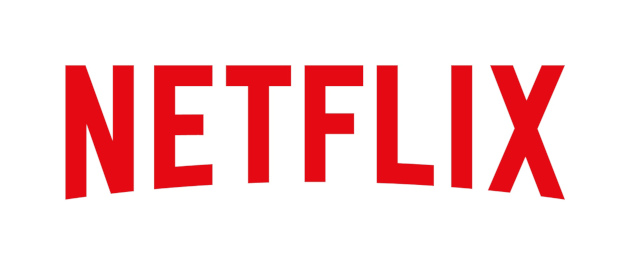

Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.


Загрузите данные, выполнив код ниже.

In [270]:
# код ниже менять нельзя (кроме пути до данных), просто запустите ячейку!
data = pd.read_csv('netflix_data.csv', encoding='cp437')
del data['ratingDescription'], data['user rating size']
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN


Удалите из данных дупликаты. Сколько объектов удалено?

In [271]:
print(data.duplicated().sum())
data = data[data.duplicated() == False]

500


Сколько объектов осталось?

In [272]:
len(data.index)

500

Сколько рейтинговых групп представлено в данных?

In [273]:
data.rating.nunique()

13

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

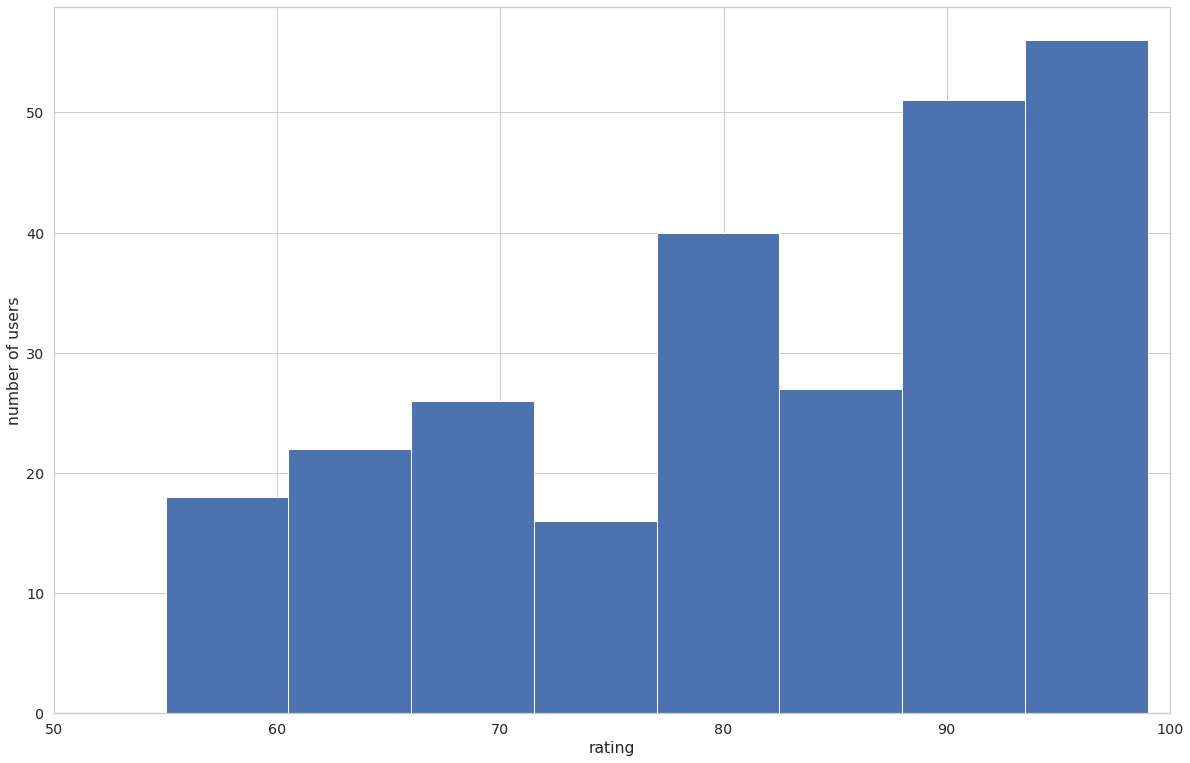

In [275]:
plt.figure(figsize=(20, 13))

plt.hist(data['user rating score'].dropna(), bins=8)
plt.xlabel('Rating')
plt.ylabel('Count of users')
plt.xlim((50, 100))

plt.show()

**Вывод:** Сериалы получают более высокие оценки от пользователей.

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [276]:
print(data['user rating score'].dropna().describe())
print(data['user rating score'].median())

count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user rating score, dtype: float64
83.5


**Ответ:** Среднее и медиана отличаются, из-за того что они устроены по разному.

В какие годы были запущены шоу, представленные в датасете?

In [277]:
data['release year'][data['release year'].duplicated() == False].sort_values()

761    1940
506    1976
252    1978
658    1982
762    1986
908    1987
519    1989
749    1990
771    1991
805    1992
500    1993
600    1994
766    1995
520    1996
563    1997
250    1998
251    1999
572    2000
150    2001
501    2002
64     2003
0      2004
275    2005
1      2006
21     2007
3      2008
15     2009
156    2010
14     2011
51     2012
6      2013
4      2014
8      2015
2      2016
7      2017
Name: release year, dtype: int64

Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

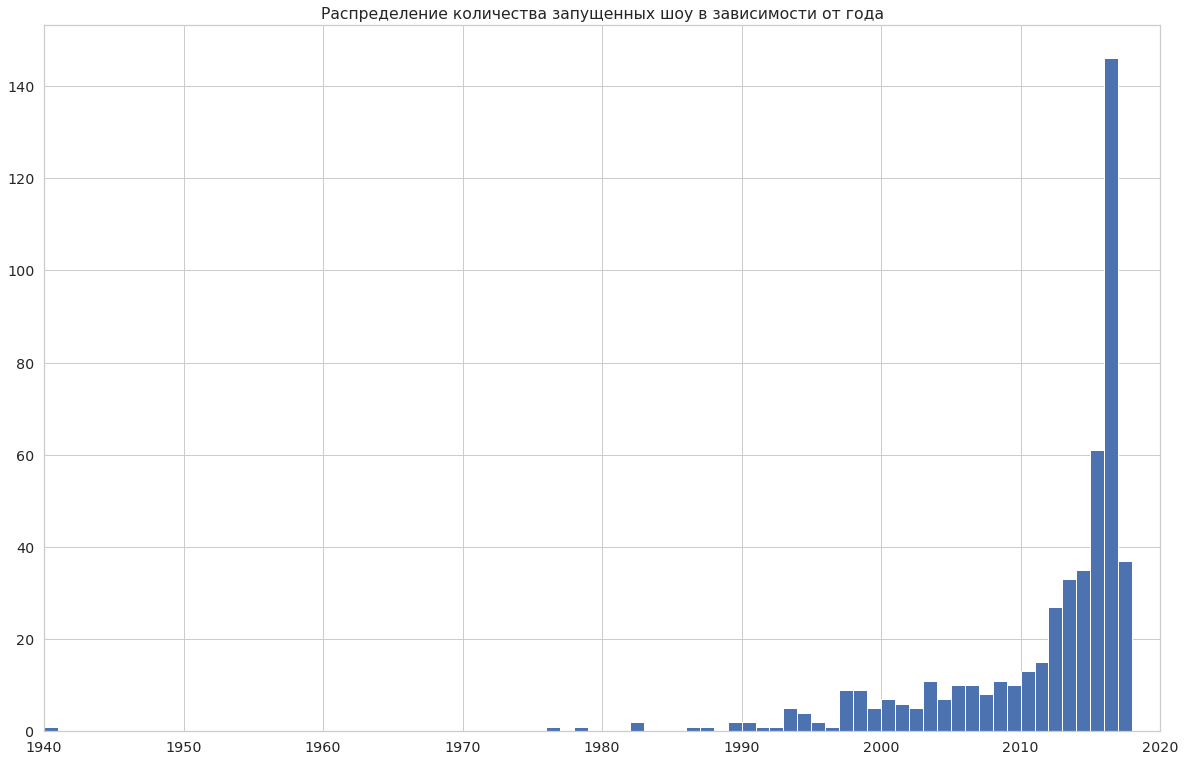

In [279]:
plt.figure(figsize=(20, 13))

years = data['release year']
plt.title('Распределение количества запущенных шоу в зависимости от года')
plt.hist(years, bins=np.arange(1940, 2020))
plt.xlim((1940, 2020))

plt.show()

**Вывод:** Выбросы есть, простмотры набирают обороты.

Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)
Ответить на этот вопрос вам поможет график, который вы построили выше.

In [280]:
res_16year = data[data['release year'] == 2016]['user rating score'].dropna()
res_17year = data[data['release year'] == 2017]['user rating score'].dropna()

print(res_16year.describe())
print(res_17year.describe())

count    86.000000
mean     84.313953
std      12.599030
min      56.000000
25%      77.000000
50%      89.000000
75%      95.000000
max      98.000000
Name: user rating score, dtype: float64
count    16.000000
mean     88.125000
std       8.585841
min      71.000000
25%      81.750000
50%      90.500000
75%      94.000000
max      99.000000
Name: user rating score, dtype: float64


**Вывод:** В среднем оценки выше, а разброс меньше. Можно сказать что 2017 год более успешный.

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройтре самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

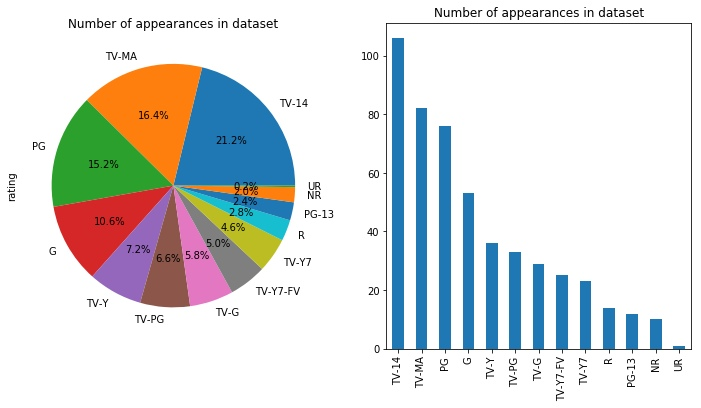

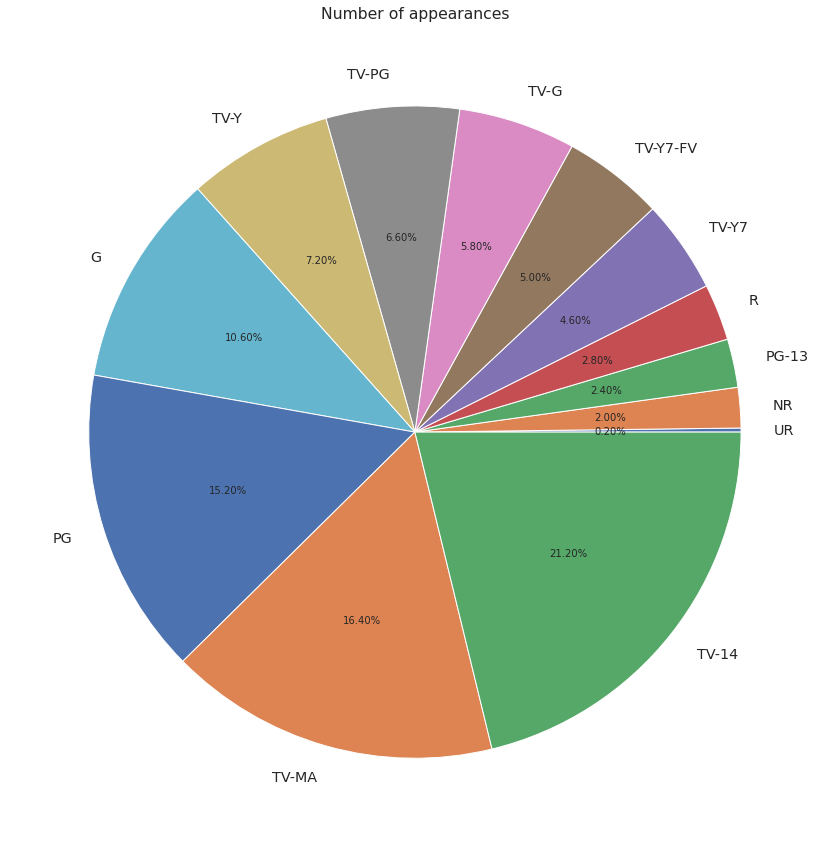

In [282]:
freq = data['rating'].groupby(data['rating']).count().sort_values()

plt.figure(figsize=(15, 15))
plt.title('Number of appearances')
plt.pie(freq, labels=freq.index, autopct='%1.3f%%')

plt.show()

**Вывод:** При сравнительном анализе диаграмма более удобна.

Составьте топ-13 самых высоко оцененных шоу. Выберите из данного топа шоу, которое вам наиболее нравится (либо используйте `scipy.stats.randint`). Обозначим это шоу N.
Ответьте на следующие вопросы:  
* Какое шоу является худшим по оценкам в рейтинговой группе, к которой принадлежит N?  
* Сколько шоу было выпущено в одном году с N?  
* Насколько бы изменилась средняя оценка шоу, выпущенных в одном году с N, если бы Netflix не запустили шоу N?

In [283]:
data.sort_values(by=['user rating score'], ascending=False)[:13]

,title,rating,ratingLevel,release year,user rating score
41,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
350,Lost,TV-14,Parents strongly cautioned. May be unsuitable ...,2010,98.0
10,Once Upon a Time,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0
64,Friends,TV-14,Parents strongly cautioned. May be unsuitable ...,2003,98.0
72,Orange Is the New Black,TV-MA,For mature audiences. May not be suitable for...,2016,98.0
27,The Flash,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0
25,Marvel's Iron Fist,TV-MA,NaN,2017,98.0
88,Finding Dory,PG,mild thematic elements,2016,98.0
62,Family Guy,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
63,Criminal Minds,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0


Ответьте на следующие вопросы при помощи `boxplot`:
* Какую рейтинговую группу зрители оценивали выше всего в последние пять лет? 
* Как менялись оценки пользователей с течением времени? Постройте `boxplot` для каждого десятилетия.

In [296]:
favorite = data[data['title'] == 'Lost'].to_dict('records')[0]
print('\"', favorite['title'], '\"', 'is favorite.')

worst = data[data['rating'] == favorite['rating']] \
    .dropna().sort_values(['user rating score']) \
    .to_dict('records')[0]['title']
print('\"', worst, '\"', 'is worst.')

" Lost " is favorite.
" Haters Back Off " is worst.


**Вывод:** Мы определили лучший и худший фильм по мнению зрителей.

---
### Задача 4

В данной задаче вам нужно будет продолжить анализ данных о видео на YouTube. Информация об имени категории видео содержится в файле `RU_category_id.json`. Следующий код читает этот файл, извлекает из него необходимую информацию, и записывает в виде `pandas`-таблицы.

In [268]:
import json

with open('./RU_category_id.json') as json_file:
    json_data = json.load(json_file)
    
category = pd.DataFrame(columns=['id', 'name'])

for item in json_data['items']:
    category = category.append(
        {'id': int(item['id']),
         'name': item['snippet']['title']},
        ignore_index=True
    )
    
category['id'] = category['id'].astype(int)
category

,id,name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


Добавьте к вашим данным имена категорий с помощью `pd.merge`.

In [ ]:
...

Составьте сводную таблицу о количестве просмотров по дням для каждой категории видео с помощю функции `pivot_table`.

In [ ]:
...

Визуализируйте таблицу с помощью `heatmap`. Для информативности поделите все числа на $10^6$.

In [ ]:
...

Сделайте аналогичную сводную таблицу, добавив суммы по строкам и столбцам, назвав их "Всего просмотров".

In [ ]:
...

В чем проблема с информативностью подобных таблиц? Исправьте это.

*Подсказка*: посмотрите на графики, которые вы построили ранее. 

In [ ]:
...

**Вывод:** <...>

---

### Задача 5

Yelp (yelp.com) — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

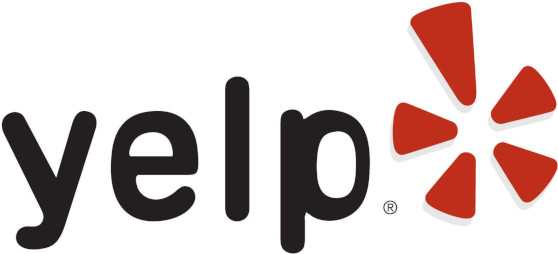

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате json можно посмотреть по ссылке
https://www.kaggle.com/yelp-dataset/yelp-dataset/data

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. Пример с несколько другой задачей: https://yandex.ru/company/researches/2017/msk_mobile_map
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. Для этого стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`. В таблице должен быть указан город (название) и количество компаний в этом городе.

Пусть N -- город с наибольшим количеством компаний.

Оставьте в таблице только записи, соответствующие городу N. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ -- долготу.

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города N и сравните ее с построенным графиком.

Попробуйте также автоматически подгружать карту города в качестве фона графика. <a href="https://plotly.com/python/scattermapbox/">Примеры.</a>

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [ ]:
reviews = pd.read_csv('yelp_review.csv')

В подгруженной таблице оценок оставьте только компании города N. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [267]:
review_ids = np.in1d(reviews['business_id'].to_list(),
                     tc_companies['business_id'].to_list())                                                               

NameError: name 'tc_companies' is not defined

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [ ]:
...

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы.

In [ ]:
...

Соедините две полученные ранее таблицы по компаниям города N в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index` (в одной из них это уже должно было быть сделано).
Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

In [ ]:
...

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [ ]:
...

Чтобы получить районы города, округлите значения широты и долготы, подобрав оптимальный размер района. Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [ ]:
...

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений -- оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

In [ ]:
...

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** <...>

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [ ]:
...

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** <...>

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `Restaurant`. Составьте таблицу, в которой будет информация о всех ресторанах города N, для которых имеется не менее $5$ отзывов. Далее постройте график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [ ]:
...

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <...>

Кот Василий очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
...

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
...

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <...>